In [1]:
import os
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
os.listdir("./runs_data/")

['20201224_004424',
 '20201224_200911',
 '.DS_Store',
 '20201227_133351',
 '20201226_213548',
 '20201226_105326']

In [3]:
# hparams_files = list(glob("./runs_data/2020*/hparams_table*"))
# hp_table = pd.concat([pd.read_csv(file).assign(run=file) for file in hparams_files])
# hp_table["run"] = hp_table["run"].str.split("/").apply(lambda s: s[2])
# hp_table.drop(columns=["epoch_accuracy.1", "epoch_loss.1"], inplace=True)
# hp_table.sort_values(by="batch_accuracy", inplace=True, ascending=False)
# hp_table.reset_index(inplace=True, drop=True)
# hp_table = hp_table[sorted(hp_table.columns)]
# hp_table.loc[hp_table["run"] == "20201226_213548", "units_0"] = 256
# hp_table.loc[hp_table["run"] == "20201226_213548", "units_1"] = 512
# hp_table.loc[hp_table["run"] == "20201226_213548", "units_3"] = 768
# hp_table.loc[hp_table["run"] == "20201224_004424", "units_0"] = hp_table[hp_table["run"] == "20201224_004424"]["units"]
# hp_table.loc[hp_table["run"] == "20201227_133351", "units_0"] = 256
# hp_table.loc[hp_table["run"] == "20201227_133351", "units_1"] = 512
# hp_table.loc[hp_table["run"] == "20201227_133351", "units_3"] = 768
# hp_table.loc[hp_table["run"] == "20201227_133351", "units_4"] = 512
# hp_table.drop(columns=["units", "num_layers"], inplace=True)
# hp_table.to_csv("hparams_table.csv")

hp_table = pd.read_csv("./metadata_evaluation/hparams_table.csv", index_col=[0])
hp_table

,batch_accuracy,batch_loss,epoch_accuracy,epoch_loss,learning_rate,run,units_0,units_1,units_2,units_3,units_4,units_5,units_6,units_7,units_8,units_9
0,0.786353,0.648104,0.786353,0.648104,0.0030,20201227_133351,256.0,512.0,512.0,768.0,512.0,NaN,NaN,NaN,NaN,NaN
1,0.786186,0.645833,0.786186,0.645833,0.0030,20201227_133351,256.0,512.0,640.0,768.0,512.0,NaN,NaN,NaN,NaN,NaN
2,0.782676,0.660403,0.782676,0.660403,0.0020,20201226_213548,256.0,512.0,576.0,768.0,512.0,NaN,NaN,NaN,NaN,NaN
3,0.781323,0.664505,0.781323,0.664505,0.0020,20201227_133351,256.0,512.0,512.0,768.0,512.0,NaN,NaN,NaN,NaN,NaN
4,0.780822,0.666532,0.780822,0.666532,0.0025,20201227_133351,256.0,512.0,640.0,768.0,512.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.634232,1.199070,0.634232,1.199070,0.0005,20201224_004424,768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,0.573592,1.371393,0.573592,1.371393,0.0001,20201224_004424,1792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,0.555850,1.424508,0.555850,1.424508,0.0001,20201224_004424,768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,0.537254,4.874017,0.537254,4.874017,0.0500,20201224_004424,1280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
hp_table["batch_accuracy"].describe()

count    66.000000
mean      0.733061
std       0.066014
min       0.438038
25%       0.709260
50%       0.763282
75%       0.773165
max       0.786353
Name: batch_accuracy, dtype: float64

In [5]:
hp_table.groupby("run")["batch_accuracy"].mean()

run
20201224_004424    0.607906
20201224_200911    0.714675
20201226_105326    0.738469
20201226_213548    0.768712
20201227_133351    0.774829
Name: batch_accuracy, dtype: float64

In [6]:
for i in range(10):
    print(hp_table.groupby(f"units_{i}")["batch_accuracy"].agg(["mean", "median", "count"]))
    print("="*50)

             mean    median  count
units_0                           
256.0    0.769354  0.770752     40
512.0    0.723142  0.713133      9
768.0    0.683579  0.693598      7
1024.0   0.697459  0.693169      3
1280.0   0.537254  0.537254      1
1536.0   0.598824  0.640035      3
1792.0   0.629471  0.654767      3
             mean    median  count
units_1                           
256.0    0.717678  0.713133      3
512.0    0.768055  0.769224     42
768.0    0.744861  0.744861      1
1024.0   0.722550  0.717479      4
1280.0   0.714325  0.714325      2
1792.0   0.705429  0.705429      2
2048.0   0.708519  0.708519      2
             mean    median  count
units_2                           
256.0    0.735409  0.735791      3
384.0    0.770719  0.770719      2
448.0    0.766513  0.767145      8
512.0    0.757168  0.763710     18
576.0    0.772526  0.773067     11
640.0    0.778749  0.778449      4
768.0    0.723743  0.723743      2
1024.0   0.704773  0.693598      3
1280.0   0.715704  0

In [7]:
hp_table.groupby("learning_rate")["batch_accuracy"].agg(["mean", "median"]).sort_index()

,mean,median
learning_rate,,
0.0001,0.679686,0.702633
0.0003,0.709139,0.707969
0.0005,0.710333,0.735791
0.0009,0.761082,0.763282
0.0010,0.765372,0.766582
0.0015,0.771930,0.772192
0.0020,0.778651,0.779274
0.0025,0.776934,0.776783
0.0030,0.773697,0.781072


[(0.0, 0.0035)]

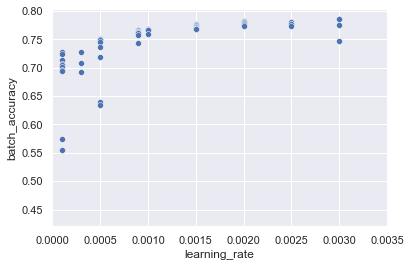

In [8]:
g = sns.scatterplot(data=hp_table, x="learning_rate", y="batch_accuracy")
g.set(xlim=(0, 0.0035))

In [9]:
# val_acc_files = list(glob("./runs_data/2020*/epoch_val_acc/*"))
# val_acc = pd.concat([pd.read_csv(file).assign(run=file) for file in val_acc_files])
# val_acc.drop(columns=["Wall time"], inplace=True)
# val_acc["run_group"] = val_acc["run"].str.split("/").apply(lambda s: s[2])
# val_acc["run"] = val_acc["run"].str.split("/").apply(lambda s: s[-1].split("_")[0])
# val_acc.to_csv("val_acc.csv")

val_acc = pd.read_csv("./metadata_evaluation/val_acc.csv", index_col=[0])

<AxesSubplot:xlabel='Step', ylabel='Value'>

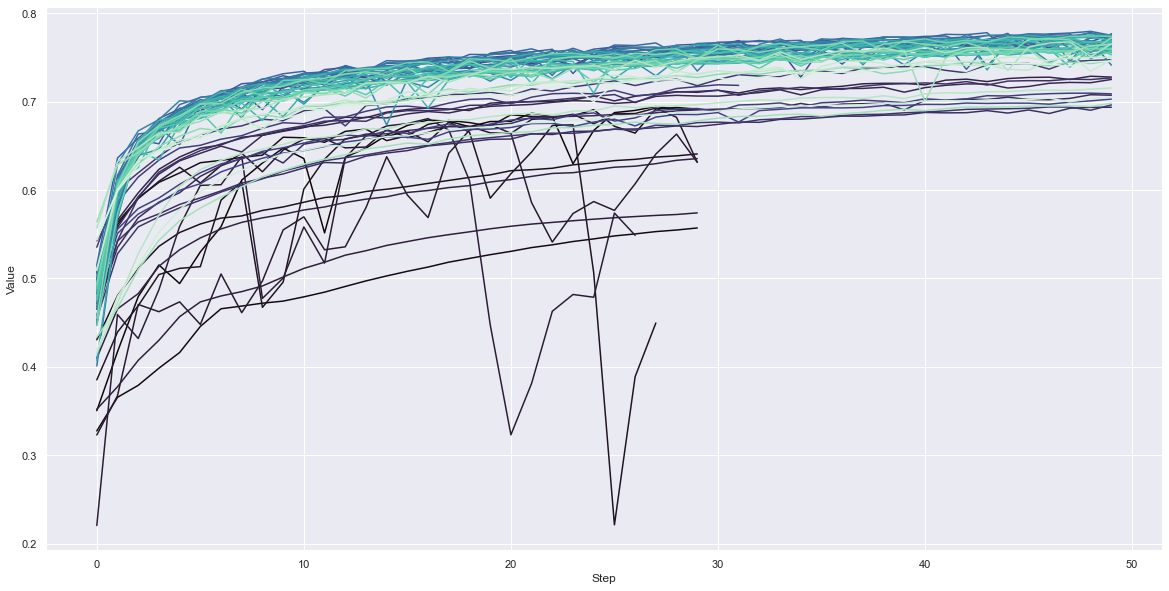

In [10]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=val_acc, x="Step", y="Value", hue="run", legend=False, palette="mako")

<AxesSubplot:xlabel='Step', ylabel='Value'>

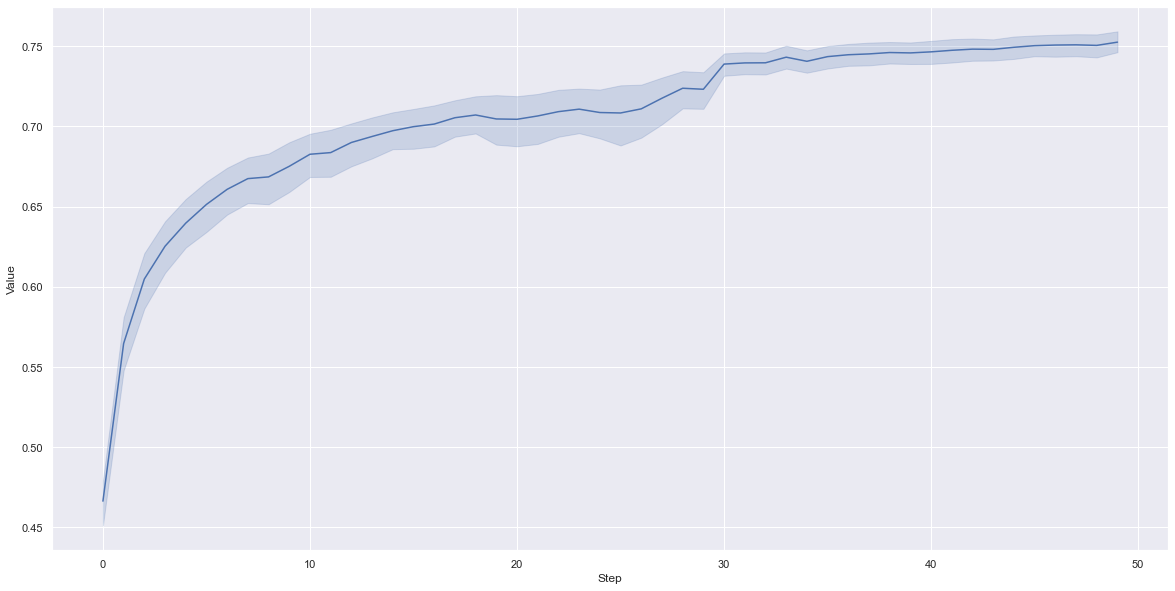

In [11]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=val_acc, x="Step", y="Value")

In [12]:
val_acc.groupby("run")["Value"].max().sort_values(ascending=False)

run
run-9123b139f2a0abef432c77992e8f760b    0.779308
run-043403ba07b61bae76e654f28308e22c    0.778173
run-838b1c5c10a018bfe01f8a52613f7915    0.777151
run-0b77265349fc57065038c82d247db43b    0.776509
run-fbbc9dbb7827f53f9f07041522211e5c    0.776420
                                          ...   
run-852c7ed9b4e45f9c4077be8070e8fd32    0.673909
run-d12aebeb26d7f9cf7d4d5e604eeb7e02    0.640740
run-3ada6e81def75668a8a1dcff34da9ca7    0.635460
run-d68064ada582a28830bacac764fdcc23    0.574116
run-0ef330da3b05b26bffd70ada5b811028    0.557058
Name: Value, Length: 63, dtype: float64